Saatvik Sandal 114378631

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mp
import math as math
import matplotlib.pyplot as plt



In [9]:
def f(x):
    return (np.exp(-x**3) - (x**4) - (np.sin(x)))

Min y: -16.90896196419778 Max y: 2965.867284468554


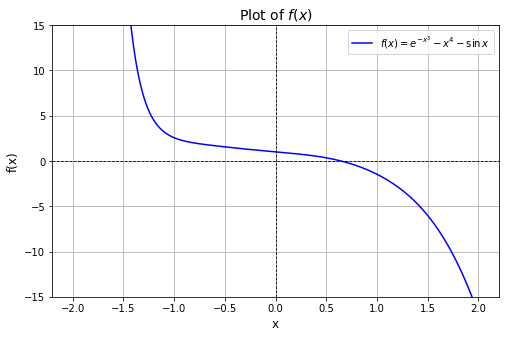

In [ ]:
x = np.linspace(-2, 2, 400)
y = f(x)


# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$f(x) = e^{-x^3} - x^4 - \sin x$", color='b')

# Highlighting x and y axes
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.axvline(0, color='black', linewidth=0.8, linestyle="--")

# Adjust y-limits dynamically
plt.ylim(-15, 15)

# Improve visualization
plt.title("Plot of $f(x)$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [19]:
def Bisection(a, b, tolerance):
    c = 0
    while(((b-a) / 2) > tolerance):
        c = (b+a) / 2
        test = f(a) * f(c)

        if(test < 0):
            b = c
        elif(test > 0):
            a = c
        else:
            return c
    
    return c

Bisection(-1, 1, 1e-10)


0.6415825419826433